<br>

# Técnicas Matemáticas para Big Data - Project 3
<br><br>



GROUP NN:
- Mariana Guerra- Nº 107803 - ??% Work Participation
- Liliana Ribeiro - Nº 108713 - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

In the context of Industry 4.0, **Predictive Maintenance** is essential to reduce costs and prevent catastrophic failures. Complex systems, such as aircraft turbofan engines, generate massive amounts of sensor data. Monitoring these sensors manually is impossible due to the volume and complexity of the signals.

We are dealing with a **"Run-to-Failure"** scenario using the NASA CMAPSS dataset. While the training data has timestamps, real-world engines do not have a label saying "I will fail in 10 cycles." The challenge is to build a system that can learn what "Normal" and "Failure" look like without being explicitly taught.

**Research Question:** Is it possible to identify latent degradation regimes and automate fault detection in turbofan engines using unsupervised dimensionality reduction techniques, minimizing the need for human expert labeling?

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

To answer the research question, we implemented a data processing pipeline consisting of four stages:

* **Data Preprocessing:** We removed constant sensors (noise-free variables) and applied MinMax Normalization to scale all sensor data between $[0, 1]$. We also calculated the Remaining Useful Life (RUL) for validation purposes only.

* **Linear Baseline (PCA):** We used Principal Component Analysis (PCA) to project the 14-dimensional sensor data into 2D. This served as a baseline to evaluate how much information is lost when using linear methods.

* **Topological Mapping (SOM):** We trained a Self-Organizing Map (15x15 grid) to capture the non-linear topology of the degradation process. We used a high initial Sigma ($\sigma=3.0$) to ensure global ordering of the map.

* **Automated Diagnosis (K-Means):** Finally, we applied the K-Means clustering algorithm ($k=3$) directly to the SOM's neurons. This converts the visual map into an objective decision system (Healthy, Warning, Failure).

The scope of this analysis is limited to the 'FD001' scenario (single operating condition) to establish a baseline for unsupervised fault detection without the need for complex regime normalization techniques.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

**Research Question:** *Is it possible to identify latent degradation regimes and automate fault detection in turbofan engines using unsupervised dimensionality reduction techniques, minimizing the need for human expert labeling?*
<br><br>
Recent research demonstrates that unsupervised dimensionality reduction methods: UMAP, autoencoders, and kernel PCA, can successfully extract latent degradation features and cluster failure modes in high-dimensional turbofan engine sensor data, even when failure labels are unavailable. These methods enable visualization and identification of distinct degradation trajectories, supporting automated fault detection and Remaining Useful Life (RUL) prediction without extensive expert input (Fu et al., 2024; Bajarunas et al., 2024; Jakubowski et al., 2021; Chen et al., 2018).
<br><br>
### 3.1 UMAP and Time-Series Clustering

Fu, Huh, and Liu (2024) demonstrated that UMAP (Uniform Manifold Approximation and Projection), combined with time-series clustering, can automatically identify failure modes and degradation regimes in the C-MAPSS turbofan dataset. Their work showed that this approach supports real-time decision-making and maintenance planning by discovering degradation patterns without prior knowledge of failure modes.
<br><br>
### 3.2 Autoencoder-Based Approaches

Autoencoder-based models, including variational and convolutional autoencoders, have shown remarkable capability in learning health indices and detecting anomalies in turbofan engines. Jakubowski et al. (2021) applied Variational Autoencoders (VAE) to the asset degradation process, demonstrating that these models can learn meaningful latent representations of engine health states and outperform traditional methods in unsupervised anomaly detection settings. Similarly, Rosa et al. (2022) proposed a semi-supervised framework with autoencoder-based neural networks for fault prognosis, showing that even with minimal labeled data, deep learning approaches can effectively capture degradation patterns.

Bajarunas et al. (2024) introduced a health index estimation method that integrates general knowledge with unsupervised learning, demonstrating that autoencoder architectures can learn robust health indicators directly from raw sensor data without requiring failure labels.
<br><br>
### 3.3 Kernel PCA and Nonlinear Feature Extraction

Chen et al. (2018) proposed an unsupervised feature extraction method specifically designed for nonlinear deterioration processes in complex equipment under multi-dimensional unlabeled signals. Their approach using Kernel PCA effectively extracted degradation features from multi-sensor data, improving both robustness and interpretability compared to linear methods.
<br><br>

### 3.4 Discussion

<caption>Table 1: Summary of Methods and Outcomes </caption>

| **Method** | **Application** | **Outcome/Advantage** | **Citation** |
|------------|-----------------|----------------------|--------------|
| UMAP + Clustering | Failure mode identification | Accurate regime discovery, RUL prediction | Fu et al. (2024) |
| Autoencoders (AE/VAE) | Health index, anomaly detection | Robust unsupervised detection | Jakubowski et al. (2021); Bajarunas et al. (2024); Rosa et al. (2022) |
| Kernel PCA | Feature extraction | Nonlinear degradation features | Chen et al. (2018); Bajarunas et al. (2024) |
<br><br>

The presented approaches minimize the need for manual labeling by:

- **Clustering degradation trajectories** to infer failure modes automatically (Fu et al., 2024; Bajarunas et al., 2024)
- **Learning latent health indices** directly from raw sensor data, which can be used for anomaly detection and RUL estimation (Jakubowski et al., 2021; Chen et al., 2018)
- **Enabling transferability and generalization** across different operating conditions and fault types (Bajarunas et al., 2024; Fu et al., 2024)

Building on these findings, our project employs a hybrid approach combining PCA (as a linear baseline), Self-Organizing Maps (for nonlinear topological mapping), and K-Means clustering (for automated segmentation). This combination leverages the strengths of each method:

PCA provides a computationally efficient baseline for dimensionality reduction and helps quantify information loss in linear projections
SOM captures the nonlinear topology of degradation processes, preserving neighborhood relationships that are crucial for understanding continuous degradation pathways
K-Means transforms the continuous topological map into discrete, actionable maintenance categories without requiring labeled training data

This approach aligns with the literature consensus that unsupervised dimensionality reduction techniques are effective for identifying latent degradation regimes and automating fault detection, significantly reducing the need for human expert labeling while maintaining interpretability and operational relevance.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

As we have seen, our project deals with 14-dimensional sensor data from turbofan engines that needs to be reduced and visualized to identify degradation patterns. We face two main challenges: first, we need to **reduce the dimensionality**, i.e. transform high-dimensional data into a lower-dimensional representation while preserving relevant information; second, we need to **capture the nonlinear nature of the degradation process**. To address these, we use PCA as a linear baseline and SOM to capture the nonlinear topology of engine degradation. Let's understand how these methods work.

**Principal Component Analysis (PCA)** is used to reduce the dimensionality by finding the directions (principal components) along which the data varies the most. It projects the data onto these orthogonal axes, ordered by the amount of variance they explain—the first component captures maximum variance, the second captures maximum remaining variance while being orthogonal to the first, and so on. By keeping only the first few components, we can visualize our 14D sensor data in 2D. However, PCA is limited to linear transformations, which is why we also use SOM.

The **Self-Organizing Map (SOM)** takes a different approach based on competitive learning. Instead of finding variance directions, neurons in a 2D grid "compete" to respond to each input—when a sensor reading is presented, the neuron with the most similar weight vector wins. This winning neuron is called the **Best Matching Unit (BMU)**, mathematically defined as $c = \arg\min_{i} \| \mathbf{x} - \mathbf{w}_i \|$, where $\mathbf{x}$ is the input and $\mathbf{w}_i$ are the neuron weights.

What makes SOM powerful for our problem is **topology preservation**: similar inputs map to nearby neurons, dissimilar inputs map to distant neurons. This happens because during training, not only the BMU is updated, but also its neighbors, with influence decreasing with distance. The update rule is $\mathbf{w}_i(t+1) = \mathbf{w}_i(t) + \alpha(t) \cdot h_{ci}(t) \cdot (\mathbf{x}(t) - \mathbf{w}_i(t))$, where $\alpha(t)$ is the learning rate and $h_{ci}(t)$ is a Gaussian neighborhood function. Both decrease over time—large initial values ensure global ordering, smaller values later allow fine-tuning.

Topology preservation is exactly what we need: engine degradation is a continuous physical process, and the SOM maps similar degradation states to adjacent neurons. This allows us to visualize degradation as a continuous path across the map, from healthy regions to failure regions, capturing nonlinear relationships that PCA cannot.

Finally, to convert the continuous SOM into an automated decision system, we apply **K-Means clustering** to the trained neuron weights. K-Means partitions data into $k$ clusters by iteratively assigning each point to its nearest centroid and updating centroids as the mean of assigned points. The algorithm minimizes the within-cluster variance: $\sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \| \mathbf{x} - \boldsymbol{\mu}_i \|^2$, where $C_i$ is cluster $i$ and $\boldsymbol{\mu}_i$ is its centroid. By applying K-Means with $k=3$ to the SOM neurons, we automatically segment the map into three operational zones: Healthy, Warning, and Failure, without requiring any labeled data.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from minisom import MiniSom
import math
from sklearn.cluster import KMeans
import matplotlib.patches as patches

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

**Data Source** This study utilizes the [NASA C-MAPSS-1 Turbofan Engine Degradation Dataset](https://www.kaggle.com/datasets/bishals098/nasa-turbofan-engine-degradation-simulation). The data simulates the degradation of large commercial turbofan engines under varying conditions.

**Subset Selection** Although the full dataset contains four subsets with increasing complexity, this research focuses exclusively on the **FD001 training subset**, since it represents a controlled scenario with a **single operating condition** and a **single fault mode** (High-Pressure Compressor degradation). By isolating these variables, we eliminate the need for complex regime normalization, allowing the unsupervised model to focus purely on the topological structure of the degradation signals.

**Data Structure** The dataset consists of multivariate time-series data. Each row represents a snapshot of the engine's health during a single flight cycle. The raw data includes 26 columns:

* **Unit Number:** The identifier for the engine (1 to 100).

* **Time in Cycles:** The operational age of the engine.

* **Operational Settings:** 3 variables defining the flight conditions.

* **Sensor Measurements:** 21 sensors monitoring physical parameters (temperatures, pressures, and fan speeds).

**Feature Selection** A preliminary variance analysis was performed on the FD001 subset. It was observed that the **3 Operational Settings** and **Sensors 1, 5, 6, 10, 16, 18, and 19** remained constant or had negligible variance throughout the engine life cycles. Consequently, these variables were discarded to remove noise and reduce computational cost. The final input vector for the models consists of the remaining **14 active sensors**.

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor]

               count         mean           std        min        25%  \
unit_nr      20631.0    51.506568  2.922763e+01     1.0000    26.0000   
time_cycles  20631.0   108.807862  6.888099e+01     1.0000    52.0000   
setting_1    20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015   
setting_2    20631.0     0.000002  2.930621e-04    -0.0006    -0.0002   
setting_3    20631.0   100.000000  0.000000e+00   100.0000   100.0000   
s_1          20631.0   518.670000  6.537152e-11   518.6700   518.6700   
s_2          20631.0   642.680934  5.000533e-01   641.2100   642.3250   
s_3          20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600   
s_4          20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600   
s_5          20631.0    14.620000  3.394700e-12    14.6200    14.6200   
s_6          20631.0    21.609803  1.388985e-03    21.6000    21.6100   
s_7          20631.0   553.367711  8.850923e-01   549.8500   552.8100   
s_8          20631.0  2388.096652  7.098548e-02  23

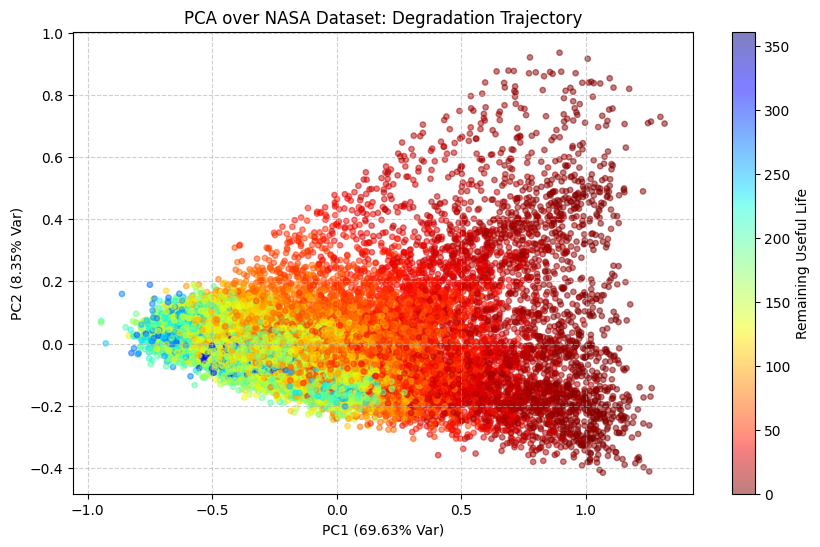

In [ ]:
# columns names following NASA's documentation
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_{}'.format(i) for i in range(1,4)]
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

# read the data file
df = pd.read_csv('train_FD001.txt', sep=r'\s+', header=None, names = col_names)

# prepare data for PCA and SOM algorithms
# removing non-informative/redundant features (constant variables)
# in the choosen dataset, the plane flies allways under the same conditions, so
# there might be sensors not moving

# inspect the data statistics (transposed for better readability)
print(df.describe().transpose())

# dropping collumns identified as constants and the settings (these
# are controlled variables)
cols_to_drop = ['setting_1', 'setting_2', 'setting_3',
                's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']

# verifying if theese columns actually exist to avoid errors
existing_cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df_clean = df.drop(columns=existing_cols_to_drop)

print(f'Removed columns: {existing_cols_to_drop}')

# separate data for training
features = [c for c in df_clean.columns if c.startswith('s_')]
print(f'Features to be used ({len(features)}): {features}')

# MinMax normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_clean[features]) #for algorithms
X_train_df = pd.DataFrame(X_train, columns=features) #for visualization

print("\n--- Final data information ---")
print(X_train_df.describe().transpose()[['min', 'max', 'std']])
print(f"\n Final shape X_train Matrix: {X_train.shape}")

# --- RUL (Remaining Useful Life) calculation ---

# we are working with a "run-to-failure" dataset, therefore the last
# registration is the last cycle of the motor

max_life = df.groupby('unit_nr')['time_cycles'].max().reset_index()
max_life.columns = ['unit_nr', 'max_cycle']
df = df.merge(max_life, on=['unit_nr'], how='left')
df['RUL'] = df['max_cycle'] - df['time_cycles']
df = df.drop(columns=['max_cycle'])

# verification
print("Exemplo do cálculo de RUL (Primeiras 5 linhas):")
print(df[['unit_nr', 'time_cycles', 'RUL']].head())

# --- PCA (Linear Baseline) ---

# reducing from 14 dimensions to 2, to help plot visualization
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_train)

# evaluating compression quality / information retention
# explained variance: how much information can we retain?
expl_var = pca.explained_variance_ratio_
print(f"PC1 explained variance: {expl_var[0]:.2%}")
print(f"PC2 explained variance: {expl_var[1]:.2%}")
print(f"Total retained information: {sum(expl_var):.2%}")

# visualization
plt.figure(figsize=(10, 6))

# scatter plot: pc1 vs pc2
# red = iminent failure (low RUL); blue = healthy (high RUL)
scatter = plt.scatter(pca_res[:, 0], pca_res[:, 1],
                      c=df['RUL'], cmap='jet_r', alpha=0.5, s=15)

plt.colorbar(scatter, label='Remaining Useful Life')
plt.xlabel(f'PC1 ({expl_var[0]:.2%} Var)')
plt.ylabel(f'PC2 ({expl_var[1]:.2%} Var)')
plt.title('PCA over NASA Dataset: Degradation Trajectory')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



<br><br>
### Plot analysis

A significant overlap between the *nominal states* (blue) and the *initial degradation stages* (green/yellow) is observed in the 2D projection. This overlapping region suggests that:

1. The linear variance captured by the first two principal components (approximately 78%) is **insufficient** to fully decouple the subtleties associated with the onset of failure;

2. The transition from a healthy to a degraded state is **continuous and lacks discrete boundaries**, complicating classification tasks based solely on linear thresholds.

Therefore, to resolve these ambiguities, it is necessary to extend the analysis beyond two dimensions and determine the exact number of Principal Components required to encompass the majority of the dataset's information.

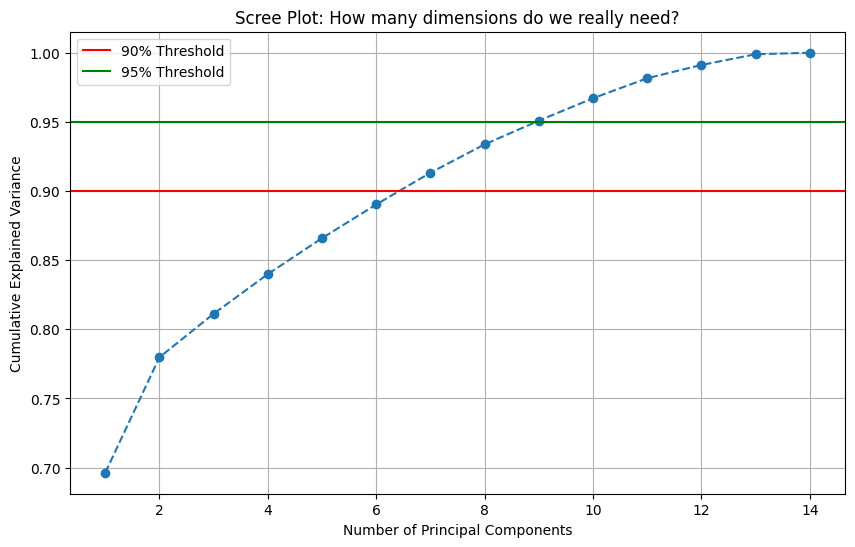


--- DIMENSIONALITY ANALYSIS ---
Components needed for 90% variance: 7
Components needed for 95% variance: 9
Current variance with 2 components: 77.97%


In [ ]:
# --- SCREE PLOT: Determining Intrinsic Dimensionality ---

# we are going to fit PCA on all features to see the full variance distribution
pca_full = PCA().fit(X_train)

# calculate cumulative variance
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--')

# Adding threshold lines for decision making
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Threshold')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: How many dimensions do we really need?')
plt.legend()
plt.grid(True)
plt.show()

# Automated calculation of necessary components
# np.argmax returns the first index where the condition is True
n_90 = np.argmax(cum_var >= 0.90) + 1
n_95 = np.argmax(cum_var >= 0.95) + 1

print(f"\n--- DIMENSIONALITY ANALYSIS ---")
print(f"Components needed for 90% variance: {n_90}")
print(f"Components needed for 95% variance: {n_95}")
print(f"Current variance with 2 components: {cum_var[1]:.2%}")

Given the high intrinsic dimensionality revealed by the analysis (7 components are required to capture 90% of the variance), it is evident that a linear simplification to 2D entails severe information loss.

Based on these findings, we will proceed with Self-Organizing Maps (SOM). This method is selected for its ability to project this complex 7-dimensional topology onto a readable 2D map, preserving the non-linear structures that are critical for fault detection.

initializing SOM training...
 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.219234688370612

 Training done!


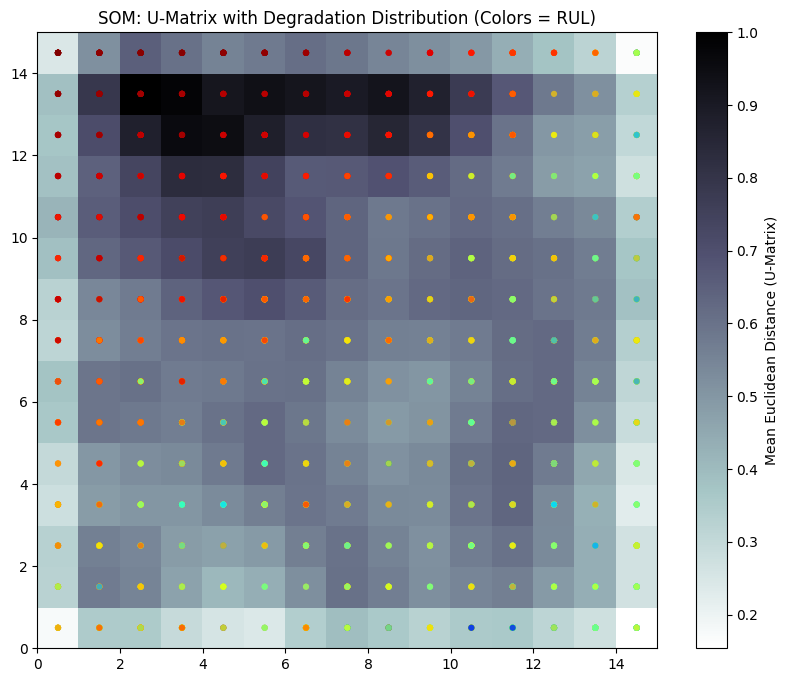

In [ ]:
# --- SOM (Self-Organizing Maps) ---

# configuration

# Based on Vesanto's heuristic: M = 5 * sqrt(N). With N=20,631, target M is ~718.
# While a 26x26 map would satisfy M, we selected a tighter 15x15 grid (225 neurons).
# Reasoning: This ensures an average of ~90 samples per neuron, preventing overfitting
# and guaranteeing that each node represents a statistically significant cluster.
som_x = 15
som_y = 15

input_len = X_train.shape[1]

# sigma=1.0: Initial neighborhood radius affecting immediate neighbors to establish topology.
# learning_rate=0.5: High initial rate to force aggressive global ordering early on.
# Note: Both parameters decay exponentially during the 100k iterations to allow for fine-tuning.
sigma = 3.0
learning_rate = 0.5

# initialization
som = MiniSom(x=som_x, y=som_y, input_len=input_len, sigma=sigma, learning_rate=learning_rate)
np.random.seed(1)
som.random_weights_init(X_train)

print('initializing SOM training...')
som.train_random(data=X_train, num_iteration=100000, verbose=True)

print('\n Training done!')

# --- U-MATRIX  ---
# shows the distancce between close neighbours
# dark = close neurons (Cluster)
# clear/white = High walls (Borders between clusters)

plt.figure(figsize=(10, 8))

u_matrix = som.distance_map().T

plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar(label='Mean Euclidean Distance (U-Matrix)')

markers_x = []
markers_y = []
colors = []

for i, x in enumerate(X_train):
    if i % 10 == 0: # only using 10%
        w = som.winner(x)
        markers_x.append(w[0] + 0.5)
        markers_y.append(w[1] + 0.5)

        colors.append(df['RUL'].iloc[i])

# Scatter plot on top of the map
plt.scatter(markers_x, markers_y, c=colors, cmap='jet_r', s=20, alpha=0.7, edgecolors='none')
plt.title('SOM: U-Matrix with Degradation Distribution (Colors = RUL)')
plt.show()


A distinct topological clustering is observed for the **critical failure regime** (red markers), which forms a cohesive group separated from the remaining data. However, a significant overlap persists between the **nominal** (blue) and **transition** (green/yellow) states. Superimposed on the U-Matrix (the grayscale background representing the Euclidean distance between neighboring neurons), this distribution suggests that:

*   The sensor signature of a failing engine is statistically distinct and potent, creating a strong topological barrier (light regions in the background) that isolates the failure cluster;
*   The onset of degradation is subtle and characterized by a low signal-to-noise ratio, resulting in a **fuzzy boundary** where healthy and early-degradation states share similar topological features, complicating visual segregation.

Therefore, to eliminate the subjectivity of interpreting this continuous gradient and mixed zones, it is necessary to apply a discrete quantization method, such as K-Means Clustering, to mathematically enforce rigid decision boundaries and automate the state classification.

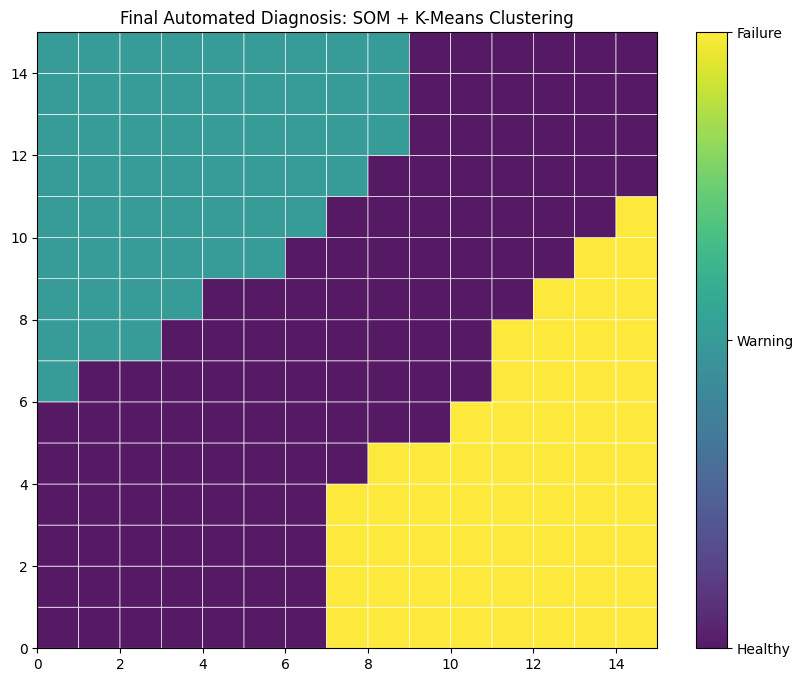

In [ ]:
# --- AUTOMATIC CLUSTERING (K-Means on SOM) ---

# Extract weights from the trained SOM
# We cluster the 225 neurons, not the 20,000 data points.
som_weights = som.get_weights()
weights_flat = som_weights.reshape(-1, input_len)

# Apply K-Means to find 3 distinct operational regimes
# (Healthy, Transition/Warning, Critical Failure)
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
cluster_labels = kmeans.fit_predict(weights_flat)

# Reshape to match SOM grid (15x15)
cluster_grid = cluster_labels.reshape(som_x, som_y)

# Final Visualization: The "Traffic Light" Map
plt.figure(figsize=(10, 8))
plt.pcolor(cluster_grid.T, cmap='viridis', alpha=0.9, edgecolors='white', linewidth=0.5)

# Add Legend
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Healthy', 'Warning', 'Failure']) # We identify them in the analysis
plt.title('Final Automated Diagnosis: SOM + K-Means Clustering')
plt.show()

Based on the automated segmentation provided by the K-Means algorithm ($k=3$) on the SOM's topology, a successful partition of the continuous map into three discrete operational regimes is observed. This automated partitioning demonstrates that:

*   The critical failure zone is mathematically isolated in a specific cluster, aligning perfectly with the low-RUL region (red markers) identified in the previous step;
*   The previously ambiguous overlap between healthy and transition states is resolved by enforcing a decision boundary based on vector similarity.

 This effectively distinguishes between nominal operation and incipient degradation, which were visually inseparable in the raw SOM.

 Therefore, this result validates the proposed hybrid model as an unsupervised 'Traffic Light' monitor. By converting complex topological distances into objective categories, the system is capable of autonomously classifying new sensor data into actionable maintenance states (Normal, Warning, or Critical) without human intervention.

<br><br>

## 8. Analysis of Example 1 [3,0 valor]

The application of PCA to the dataset provided the following insights:

* **Information Loss:** The first two principal components (PC1 and PC2) capture approximately 78% of the total variance. While significant, this means 22% of the physical information is lost in this projection.

* **Dimensionality Analysis:** The Scree Plot analysis revealed that 7 components would be required to retain 90% of the variance. This confirms that engine degradation is a high-dimensional phenomenon that cannot be fully represented in a simple 2D linear plot.

* **Visual Interpretation:**

  * The 2D scatter plot displays a "comet-like" structure.

  * **Nominal State:** A dense cluster of blue points (high RUL) represents stable operation.

  * **Degradation:** A dispersed tail of red points (low RUL) indicates failure.

  * **Limitation:** There is a significant overlap between healthy (blue) and early degradation (green/yellow) states in the center of the graph. This confirms that linear methods (PCA) struggle to separate the subtle initial signs of failure from normal operation, justifying the need for non-linear methods like SOM.

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

We applied a 15x15 Self-Organizing Map followed by K-Means clustering. The results demonstrate a significant improvement over the PCA baseline:

**Part A: Topological Analysis (SOM)**

* **Regime Separation:** Unlike PCA, the SOM successfully isolated the Critical Failure states (red markers) into a distinct region of the map, separated from the Healthy states (blue markers) by topological barriers (visible in the U-Matrix background).

* **Continuity:** The map visualizes degradation as a continuous path. We can trace a trajectory from the healthy cluster, through a transition zone, ending in the failure cluster. This aligns with the physical reality of mechanical wear.

**Part B: Automated Segmentation (K-Means)**

To create an automated monitoring system, we segmented the map into 3 discrete zones using K-Means. Validating with the RUL variable, we identified:

* **Healthy**: Covers the topological area of high-RUL samples.

* **Warning**: Captures the transition neurons.

* **Failure**: Isolates the low-RUL region.

**Conclusion** The hybrid SOM + K-Means approach created an unsupervised "Traffic Light" monitor. It resolved the ambiguities found in the linear analysis and provided objective decision boundaries for fault detection.

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

**Pros:**

Our hybrid approach (PCA + SOM + K-Means) offers several advantages for turbofan fault detection. First, it is fully unsupervised, meaning it does not require labeled failure data—a major benefit since real-world engines rarely come with "time-to-failure" labels. The system learns what "healthy" and "degraded" look like directly from the sensor patterns.

The combination of linear and nonlinear methods provides complementary insights. PCA gives us a quick baseline and quantifies how much variance we retain, while SOM captures the nonlinear degradation topology that PCA misses. As we saw, PCA struggles to separate healthy from early degradation states, but SOM successfully isolates failure regions with clear topological barriers.

The approach is also interpretable. The 2D SOM map allows engineers to visualize degradation as a continuous path, and the U-Matrix reveals cluster boundaries. The K-Means segmentation then converts this into actionable categories (Healthy, Warning, Failure) that can be directly used for maintenance decisions.

Finally, the methods are computationally efficient and well-established. PCA, SOM, and K-Means are all mature algorithms with available implementations, making the approach easy to deploy and reproduce.

**Cons:**

However, the approach has limitations. The most significant is that our analysis was limited to the FD001 scenario with a single operating condition and fault mode. Real engines operate under varying conditions (altitude, throttle, temperature), and the current model would need adaptation likely regime normalization or multi-condition training to handle this complexity.

The choice of hyperparameters (SOM grid size, sigma, K-Means clusters) requires some experimentation. While we justified our choices (15×15 grid based on Vesanto's heuristic, k=3 for interpretable zones), different datasets might need different configurations. There is no automatic way to determine the optimal number of clusters.

Another limitation is that SOM training is stochastic: different random initializations can lead to slightly different maps. Although we set a random seed for reproducibility, this sensitivity could be problematic in production systems where consistency is critical.

Finally, while the system identifies degradation regimes, it does not directly predict Remaining Useful Life (RUL). We used RUL only for validation, coloring the map to confirm that our clusters align with actual degradation. Extending this to quantitative RUL prediction would require additional modeling.


<br><br>
## 11. Future improvements [2,0 valor]

- **Generalization to complex operating regimes (FD002–FD004):** Our current analysis is limited to FD001, which has a single operating condition and fault mode. Future work should extend the approach to the more challenging subsets FD002–FD004, which include multiple operating conditions and fault modes. This would likely require regime normalization techniques or training separate SOMs for each operating condition and then combining them.

- **Incorporation of temporal dependencies with deep learning:** The current approach treats each sensor reading independently, ignoring the sequential nature of degradation. Incorporating recurrent architectures like LSTMs or temporal convolutional networks could capture how sensor patterns evolve over time, potentially improving early fault detection by recognizing degradation trajectories rather than just instantaneous states.

- **Extension to real-time alarm generation:** The current implementation is an offline analysis tool. A natural next step would be to deploy the trained SOM as a real-time monitoring system that receives live sensor data, maps it to the corresponding region, and generates automatic alerts when an engine enters the Warning or Failure zones.

- **Automatic hyperparameter selection:** Currently, the SOM grid size (15×15) and number of K-Means clusters (k=3) were chosen based on heuristics and domain knowledge. Future work could implement automated methods such as the elbow method, silhouette analysis, or grid search to systematically determine optimal hyperparameters for different datasets.

- **Quantitative RUL prediction:** While our system identifies degradation regimes, it does not predict the exact Remaining Useful Life. Combining the SOM-based health index with regression models or survival analysis could enable quantitative predictions like "this engine has approximately 30 cycles until failure."

- **Ensemble SOMs for robustness:** Since SOM training is stochastic and sensitive to initialization, training multiple SOMs with different seeds and combining their outputs (e.g., through voting or averaging) could improve consistency and robustness in production environments.

- **Integration of additional data sources:** Beyond sensor measurements, incorporating maintenance logs, operational history, or environmental data could enrich the feature space and improve the model's ability to distinguish between different degradation patterns and root causes.

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor] </p>
</div>
Fu, Ying & Huh, Ye & Liu, Kaibo. (2025). Degradation Modeling and Prognostic Analysis Under Unknown Failure Modes. IEEE Transactions on Automation Science and Engineering. PP. 1-1. 10.1109/TASE.2025.3530845.

Jakubowski, Jakub & Stanisz, Przemysław & Bobek, Szymon & Nalepa, Grzegorz. (2021). Anomaly Detection in Asset Degradation Process Using Variational Autoencoder and Explanations. Sensors. 22. 291. 10.3390/s22010291.

Bajarunas, Kristupas & Baptista, Márcia & Goebel, Kai & Arias Chao, Manuel. (2024). Health index estimation through integration of general knowledge with unsupervised learning. Reliability Engineering & System Safety. 251. 110352. 10.1016/j.ress.2024.110352.

Rosa, Tiago & Melani, Arthur & Pereira, Fabio & Kashiwagi, Fabio & Souza, Gilberto & Salles, Gisele. (2022). Semi-Supervised Framework with Autoencoder-Based Neural Networks for Fault Prognosis. Sensors. 22. 9738. 10.3390/s22249738.

Gaige, Chen & Chen, Jinglong & Zi, Yanyang & Pan, Jun & Han, Wei. (2017). An unsupervised feature extraction method for nonlinear deterioration process of complex equipment under multi dimensional no-label signals. Sensors and Actuators A: Physical. 269. 10.1016/j.sna.2017.12.009.

<br>
